<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/RNC_ini_pesos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.initializers import RandomNormal, GlorotUniform, HeNormal, Zeros
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28, 28, 1) / 255.0, x_test.reshape(-1, 28, 28, 1) / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#modelos
def build_model(initializer):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer=initializer),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(10, activation='softmax', kernel_initializer=initializer)
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Diferentes inicializadores para probar
initializers = {
    'Random Normal': RandomNormal(mean=0.0, stddev=0.05),
    'Glorot Uniform': GlorotUniform(),
    'He Normal': HeNormal(),
    'Zeros': Zeros()  # No se recomienda por la simetria
}

In [5]:
#entrenamiento del modelo
history_dict = {}
for name, init in initializers.items():
    print(f"Training with {name} initializer")
    model = build_model(init)
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)
    history_dict[name] = history


Training with Random Normal initializer


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
1875/1875 - 52s - loss: 0.1525 - accuracy: 0.9524 - val_loss: 0.0457 - val_accuracy: 0.9856 - 52s/epoch - 28ms/step
Epoch 2/10
1875/1875 - 49s - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0421 - val_accuracy: 0.9869 - 49s/epoch - 26ms/step
Epoch 3/10
1875/1875 - 51s - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0306 - val_accuracy: 0.9899 - 51s/epoch - 27ms/step
Epoch 4/10
1875/1875 - 49s - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0459 - val_accuracy: 0.9836 - 49s/epoch - 26ms/step
Epoch 5/10
1875/1875 - 49s - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0303 - val_accuracy: 0.9902 - 49s/epoch - 26ms/step
Epoch 6/10
1875/1875 - 50s - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0278 - val_accuracy: 0.9914 - 50s/epoch - 27ms/step
Epoch 7/10
1875/1875 - 49s - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0363 - val_accuracy: 0.9891 - 49s/epoch - 26ms/step
Epoch 8/10
1875/1875 - 49s - loss: 0.0099 - accuracy: 0.9964 - val_loss: 0.0332 - val_accuracy: 0.9915 - 49s/ep

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
1875/1875 - 52s - loss: 0.1236 - accuracy: 0.9621 - val_loss: 0.0381 - val_accuracy: 0.9879 - 52s/epoch - 28ms/step
Epoch 2/10
1875/1875 - 50s - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0368 - val_accuracy: 0.9878 - 50s/epoch - 27ms/step
Epoch 3/10
1875/1875 - 50s - loss: 0.0275 - accuracy: 0.9918 - val_loss: 0.0358 - val_accuracy: 0.9887 - 50s/epoch - 27ms/step
Epoch 4/10
1875/1875 - 51s - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0280 - val_accuracy: 0.9900 - 51s/epoch - 27ms/step
Epoch 5/10
1875/1875 - 51s - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0314 - val_accuracy: 0.9903 - 51s/epoch - 27ms/step
Epoch 6/10
1875/1875 - 48s - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.0292 - val_accuracy: 0.9919 - 48s/epoch - 25ms/step
Epoch 7/10
1875/1875 - 48s - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0280 - val_accuracy: 0.9924 - 48s/epoch - 26ms/step
Epoch 8/10
1875/1875 - 48s - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.0318 - val_accuracy: 0.9925 - 48s/ep

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
1875/1875 - 50s - loss: 0.1152 - accuracy: 0.9641 - val_loss: 0.0548 - val_accuracy: 0.9832 - 50s/epoch - 27ms/step
Epoch 2/10
1875/1875 - 49s - loss: 0.0412 - accuracy: 0.9866 - val_loss: 0.0474 - val_accuracy: 0.9842 - 49s/epoch - 26ms/step
Epoch 3/10
1875/1875 - 50s - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0353 - val_accuracy: 0.9887 - 50s/epoch - 26ms/step
Epoch 4/10
1875/1875 - 47s - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0374 - val_accuracy: 0.9888 - 47s/epoch - 25ms/step
Epoch 5/10
1875/1875 - 48s - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0458 - val_accuracy: 0.9866 - 48s/epoch - 26ms/step
Epoch 6/10
1875/1875 - 49s - loss: 0.0117 - accuracy: 0.9960 - val_loss: 0.0277 - val_accuracy: 0.9914 - 49s/epoch - 26ms/step
Epoch 7/10
1875/1875 - 50s - loss: 0.0093 - accuracy: 0.9972 - val_loss: 0.0295 - val_accuracy: 0.9917 - 50s/epoch - 27ms/step
Epoch 8/10
1875/1875 - 49s - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0257 - val_accuracy: 0.9916 - 49s/ep

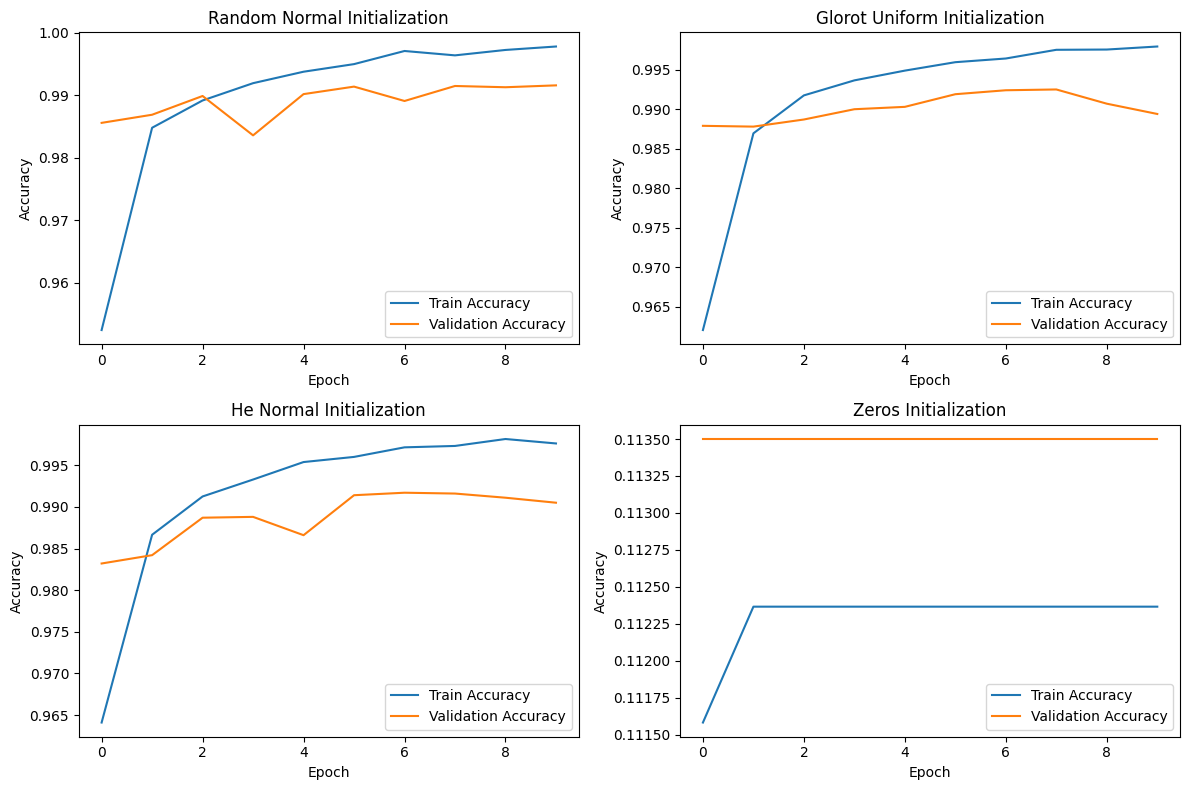

In [6]:
plt.figure(figsize=(12, 8))
for i, (name, history) in enumerate(history_dict.items()):
    plt.subplot(2, 2, i + 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Initialization')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


In [7]:
 metrics_dict = {}
for name, history in history_dict.items():
    metrics_dict[name] = {
        'Train Accuracy': history.history['accuracy'][-1],
        'Validation Accuracy': history.history['val_accuracy'][-1],
        'Train Loss': history.history['loss'][-1],
        'Validation Loss': history.history['val_loss'][-1]
    }

metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)

                Train Accuracy  Validation Accuracy  Train Loss  \
Random Normal         0.997817               0.9916    0.006291   
Glorot Uniform        0.997933               0.9894    0.005928   
He Normal             0.997617               0.9905    0.007222   
Zeros                 0.112367               0.1135    2.301333   

                Validation Loss  
Random Normal          0.041103  
Glorot Uniform         0.050068  
He Normal              0.039906  
Zeros                  2.300929  
